FDM L2 Error (nx=16): 0.121885
FDM Wall-Clock Time: 0.000232 seconds


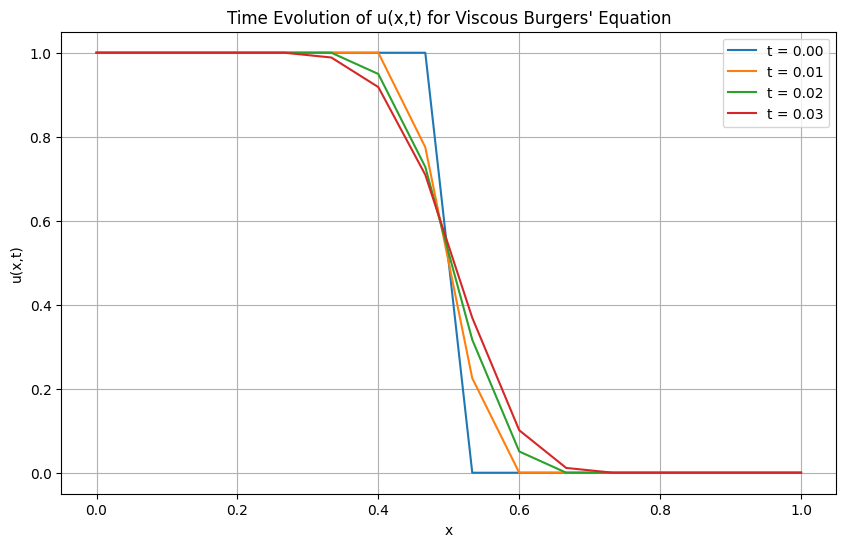

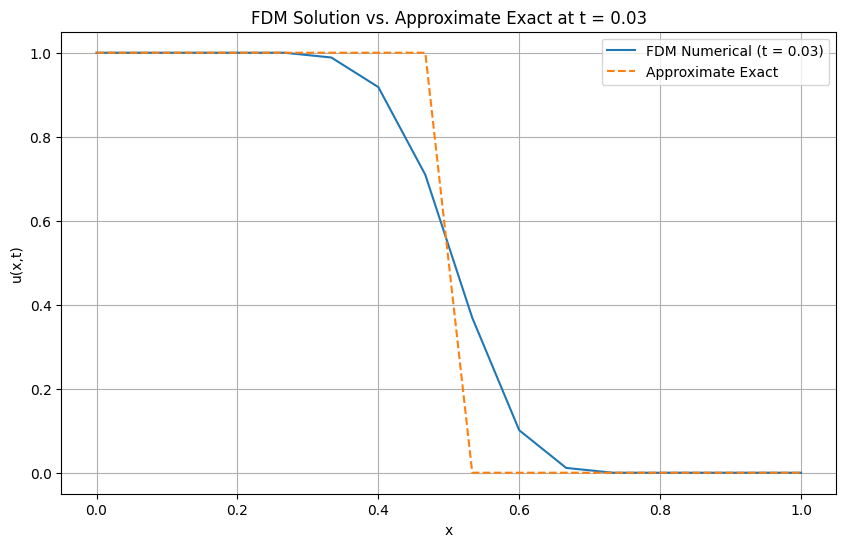

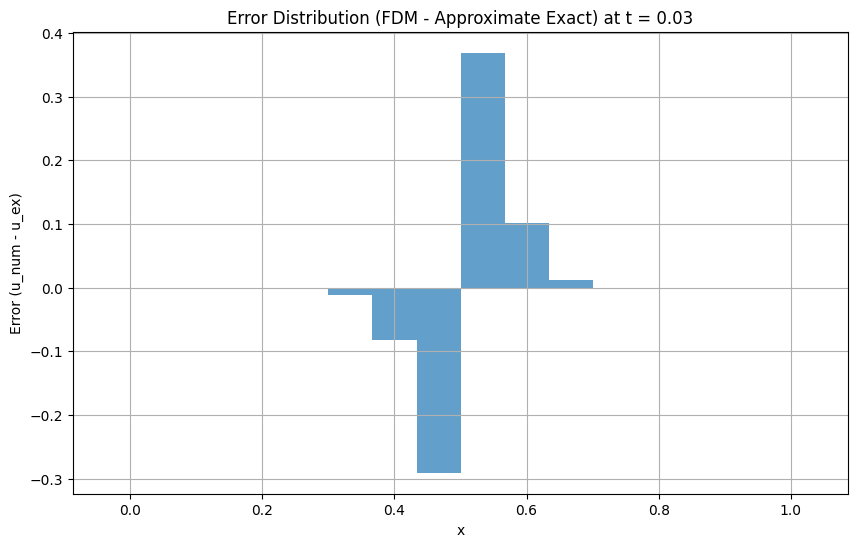

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time

# Parameters
L = 1.0  # Domain length
nx = 16  # Number of grid points
dx = L / (nx - 1)  # Grid spacing
x = np.linspace(0, L, nx)  # Grid points
ν = 0.1  # Viscosity
dt = 0.01  # Time step
nt = 3  # Number of time steps

# Initial condition (Riemann step)
u = np.where(x <= 0.5, 1.0, 0.0)

# Upwind Finite Difference Method (FDM) with diffusion
def fdm_solver(u, dt, dx, ν, nt):
    u_num = u.copy()
    u_history = [u_num.copy()]  # Store solution at each time step
    start_time = time.time()
    for n in range(nt):
        u_new = np.zeros_like(u_num)
        for i in range(1, nx-1):  # Interior points
            i_left = i - 1
            i_right = i + 1
            # Advection term (upwind)
            advection = u_num[i] * (u_num[i] - u_num[i_left]) / dx
            # Diffusion term
            diffusion = ν * (u_num[i_right] - 2 * u_num[i] + u_num[i_left]) / dx**2
            u_new[i] = u_num[i] - dt * advection + dt * diffusion
        # Apply boundary conditions
        u_new[0] = 1.0  # u(0, t) = 1
        u_new[-1] = 0.0  # u(1, t) = 0
        u_num = u_new.copy()
        u_history.append(u_num.copy())  # Save each time step
    end_time = time.time()
    return u_num, end_time - start_time, u_history

# Run FDM
u_fdm, time_fdm, u_history = fdm_solver(u, dt, dx, ν, nt)

# Approximate exact solution (smoothed shock position)
t = nt * dt
shock_pos = 0.5 + 0.5 * t  # Approximate shock movement, adjusted for viscosity
u_ex = np.where(x <= shock_pos, 1.0, 0.0)  # Rough approximation

# Compute L2 error (approximate)
l2_error_fdm = np.sqrt(np.mean((u_fdm - u_ex)**2))

# Print results
print(f'FDM L2 Error (nx=16): {l2_error_fdm:.6f}')
print(f'FDM Wall-Clock Time: {time_fdm:.6f} seconds')

# Visualizations

# 1. Time Evolution Plot (Line Plot)
plt.figure(figsize=(10, 6))
times = np.arange(nt + 1) * dt
for i, u_step in enumerate(u_history):
    plt.plot(x, u_step, label=f't = {times[i]:.2f}')
plt.title('Time Evolution of u(x,t) for Viscous Burgers\' Equation')
plt.xlabel('x')
plt.ylabel('u(x,t)')
plt.legend()
plt.grid(True)
plt.show()

# 2. Final Solution vs. Approximate Exact (Line Plot)
plt.figure(figsize=(10, 6))
plt.plot(x, u_fdm, label='FDM Numerical (t = 0.03)')
plt.plot(x, u_ex, label='Approximate Exact', linestyle='--')
plt.title('FDM Solution vs. Approximate Exact at t = 0.03')
plt.xlabel('x')
plt.ylabel('u(x,t)')
plt.legend()
plt.grid(True)
plt.show()

# 3. Error Distribution (Bar Plot)
error = u_fdm - u_ex
plt.figure(figsize=(10, 6))
plt.bar(x, error, width=dx, align='center', alpha=0.7)
plt.title('Error Distribution (FDM - Approximate Exact) at t = 0.03')
plt.xlabel('x')
plt.ylabel('Error (u_num - u_ex)')
plt.grid(True)
plt.show()

